In [1]:
# reload the python scripts after modification without having to restart the notebook
%load_ext autoreload
%autoreload 2

In [5]:
# standard libraries
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# from this library
from course_2_path_finding.shapely_env import ShapelyEnv
import course_2_path_finding.grid_space_partitioning as grd_prt
import course_2_path_finding.algo_path_finding as algo_pf


# Define the environment and add objects 

ori_point_coords [40  0]
points_coords [array([100.,  85.]), array([ 96.54181831, 101.26946572]), array([ 86.76522425, 114.72579302]), array([ 72.36067977, 123.04226065]), array([ 55.81886147, 124.78087581]), array([ 40.        , 119.64101615]), array([ 27.63932023, 108.51141009]), array([20.87409597, 93.31646763]), array([20.87409597, 76.68353237]), array([27.63932023, 61.48858991]), array([40.        , 50.35898385]), array([55.81886147, 45.21912419]), array([72.36067977, 46.95773935]), array([86.76522425, 55.27420698]), array([96.54181831, 68.73053428])]


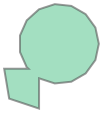

In [3]:
# Define a continuous environment with objects within
simple_env = ShapelyEnv()
simple_env.add_disc(np.array([60, 85]), 40)
simple_env.add_polygon(np.array([[10,30],[5,60],[40,60],[40,20]]))


# # A discrete representation of the env to check that the objects were correctly added
simple_env.objects

# Space partitioning

## Grid space partitioning

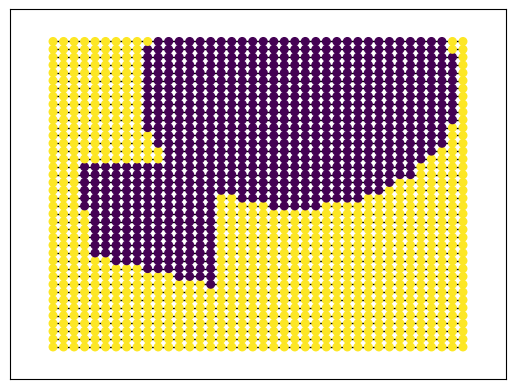

In [6]:
nelemx,nelemy = 40,40
G = grd_prt.generate_grid_graph(simple_env, grid_bounds=[0,0,100,100],nelemx=nelemx,nelemy=nelemy)

# probe the environment to know where an object is
grd_prt.check_available(simple_env,G)
# node size should be changed if nelemx and nelemy are modified
nx.draw_networkx(G,pos=nx.get_node_attributes(G, "coords"), node_size=30,with_labels=False,node_color=list(nx.get_node_attributes(G, "available").values()))

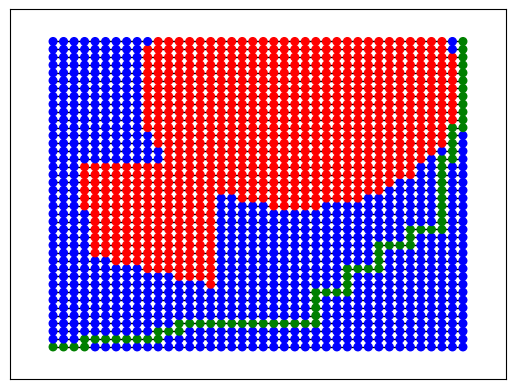

In [7]:
# Find the shortest path between start_node and end_node 
start_node = (0,0)
end_node = (nelemx-1,nelemy-1)

path = algo_pf.path_finding_djisktra(G,start_node,end_node)
grd_prt.color_path_and_graph(simple_env,G,path)
nx.draw_networkx(G,pos=nx.get_node_attributes(G, "coords"),node_size=30,with_labels=False,node_color=list(nx.get_node_attributes(G, "color").values()))